# 이미지 임계처리

이미지 이진화의 방법
Simple thresholding, Adaptive thresholding, Otsu's thresholding


## 기본 임계처리

이미지 임계값보다 크면 백, 작으면 흑이 된다.

`cv2.threshold(src, thres, maxval, type)`
- src : input-type, single-channel 이어야함
- thres : 임계값
- maxval : 임계값을 넘었을 때 적용할 value
- type
    - cv2.THRESH_BINARY : 임계보다 크면 value, 작으면 0
    - cv2.THRESH_BINARY_INV : 임계보다 작으면 0, 크면 value
    - cv2.THRESH_TRUNC : 픽셀값이 임계보다 크면 threshold_value, 작으면 픽셀값
    - cv2.THRESH_TOZERO : 픽셀값이 임계보다 크면 픽셀 값, 작으면 0
    - cv2.THRESH_TOZERO_INV : 픽셀 값이 threshold_value 보다 크면 0, 작으면 픽셀

<function matplotlib.pyplot.show(close=None, block=None)>

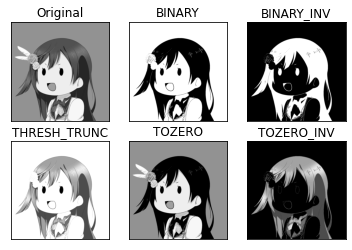

In [24]:
# 각 타입 별 thresholding 결과
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("Images/Sample_nizi3.png",0)

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) # ret : 사용된 임계값
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'BINARY', 'BINARY_INV', 'THRESH_TRUNC', "TOZERO", "TOZERO_INV"]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
#     plt.figure(figsize=(10,10))
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show

## 적응 임계처리
이미지 전역에 대해 처리하는 것이 아니라, 이미지의 작은 영역별로 thresholding

`cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)`
- src : 흑백 이미지
- maxValue : 임계값
- adaptiveMethod : 적용하는 계산 방법
- thresholdType : threshold type
- blockSize : threshold 를적용할 영역 사이즈
- C : 가중치 감소량

### Adaptive Method
- cv2.ADAPTIVE_THRESH_MEAN_C : 주변영역의 평균값으로
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C : (blockSize * blockSize) 영역의 평균에 C를 뺀 값을 문턱값으로 함

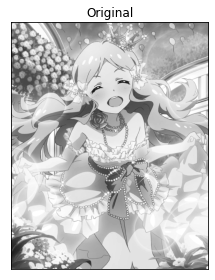

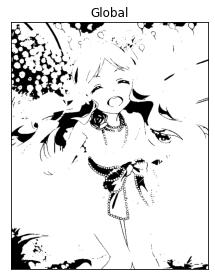

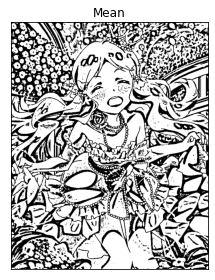

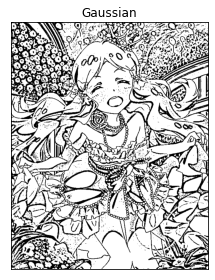

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("Images/Sample_mili3.jpg",cv2.IMREAD_GRAYSCALE)

ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

titles = ["Original", "Global", "Mean", "Gaussian"]
images = [img, th1, th2, th3]

for i in range(4):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

# Otsu의 이진화

trial 방식으로 설정하던 임계값에서 벗어나
bimodal image 의 경우는 임계점을 잘 계산할 수 있다.

적용 방법은 cv2.threshold() 의 flag에 추가로 cv2.THERSH_STSU 를 적용하면 된다. (임계값은 0)

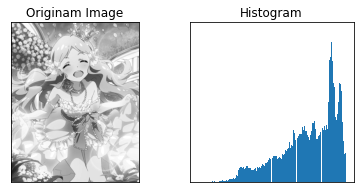

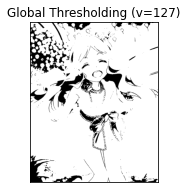

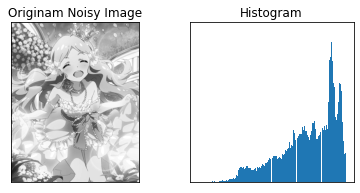

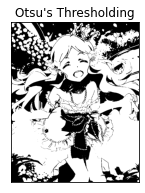

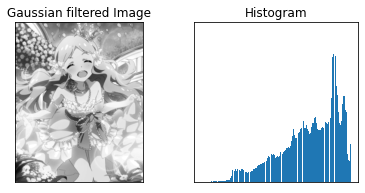

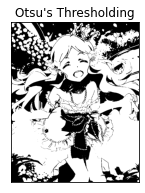

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("Images/Sample_mili3.jpg", cv2.IMREAD_GRAYSCALE)

# global thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img, (5,5), 0)

ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 모든 이미지와 히스토그램 표시
images = [img, 0, th1, img, 0, th2, blur, 0, th3]

titles = ["Originam Image", "Histogram", "Global Thresholding (v=127)", "Originam Noisy Image", "Histogram", "Otsu's Thresholding", "Gaussian filtered Image", "Histogram", "Otsu's Thresholding"]

for i in range(3):
    plt.figure(figsize=(10,10))
    plt.subplot(3, 3, i*3 + 1)
    plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3, 3, i*3 + 2)
    plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i*3 + 1]), plt.xticks([]), plt.yticks([])
    
    plt.figure(figsize=(10,10))
    plt.subplot(3, 3, i*3 + 3)
    plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2]), plt.xticks([]), plt.yticks([])
    
plt.show()